In [2]:
import pandas as pd
from matplotlib import pyplot as plt

from ccb.experiment import parse_results

%load_ext autoreload
%autoreload 2

## observations
* val loss and val accuracy don't start at the same step. Why?
* val accuracy can decrease over time (it doesn't always stay flat). Maybe it's a better indicator of the best hyper-parameter and the best time step.
* Val accuracy is particularly noisy
* many curves overfits right from the beginning and so2sat almost exclusively overfits
* conv4 is often not converged


In [9]:
# sweep_results_path = "/mnt/data/experiments/nils/classification_results/sweep_results_2022-07-20_11-24-05.csv"
sweep_results_path = "/mnt/data/experiments/nils/new_classification_results/sweep_results_2022-09-13_13-11-39.csv"

df = pd.read_csv(sweep_results_path)

df_1x = df[(df["partition_name"] == "1.00x_train") | (df["partition_name"] == "default")]

pv4ger_classification
defaultdict(<class 'list'>, {})
{'/mnt/data/experiments/nils/new_classification_sweeps/1.00x_train_classification_v0.6_09-06-2022_16:20:22/pv4ger_classification/csv_logs/version_10': '', '/mnt/data/experiments/nils/new_classification_sweeps/1.00x_train_classification_v0.6_09-06-2022_16:20:22/pv4ger_classification/csv_logs/version_2': '', '/mnt/data/experiments/nils/new_classification_sweeps/1.00x_train_classification_v0.6_09-06-2022_16:20:22/pv4ger_classification/csv_logs/version_9': '', '/mnt/data/experiments/nils/new_classification_sweeps/1.00x_train_classification_v0.6_09-06-2022_16:20:22/pv4ger_classification/csv_logs/version_3': '', '/mnt/data/experiments/nils/new_classification_sweeps/1.00x_train_classification_v0.6_09-06-2022_16:20:22/pv4ger_classification/csv_logs/version_0': '', '/mnt/data/experiments/nils/new_classification_sweeps/1.00x_train_classification_v0.6_09-06-2022_16:20:22/pv4ger_classification/csv_logs/version_11': ''}
defaultdict(<class 'list'

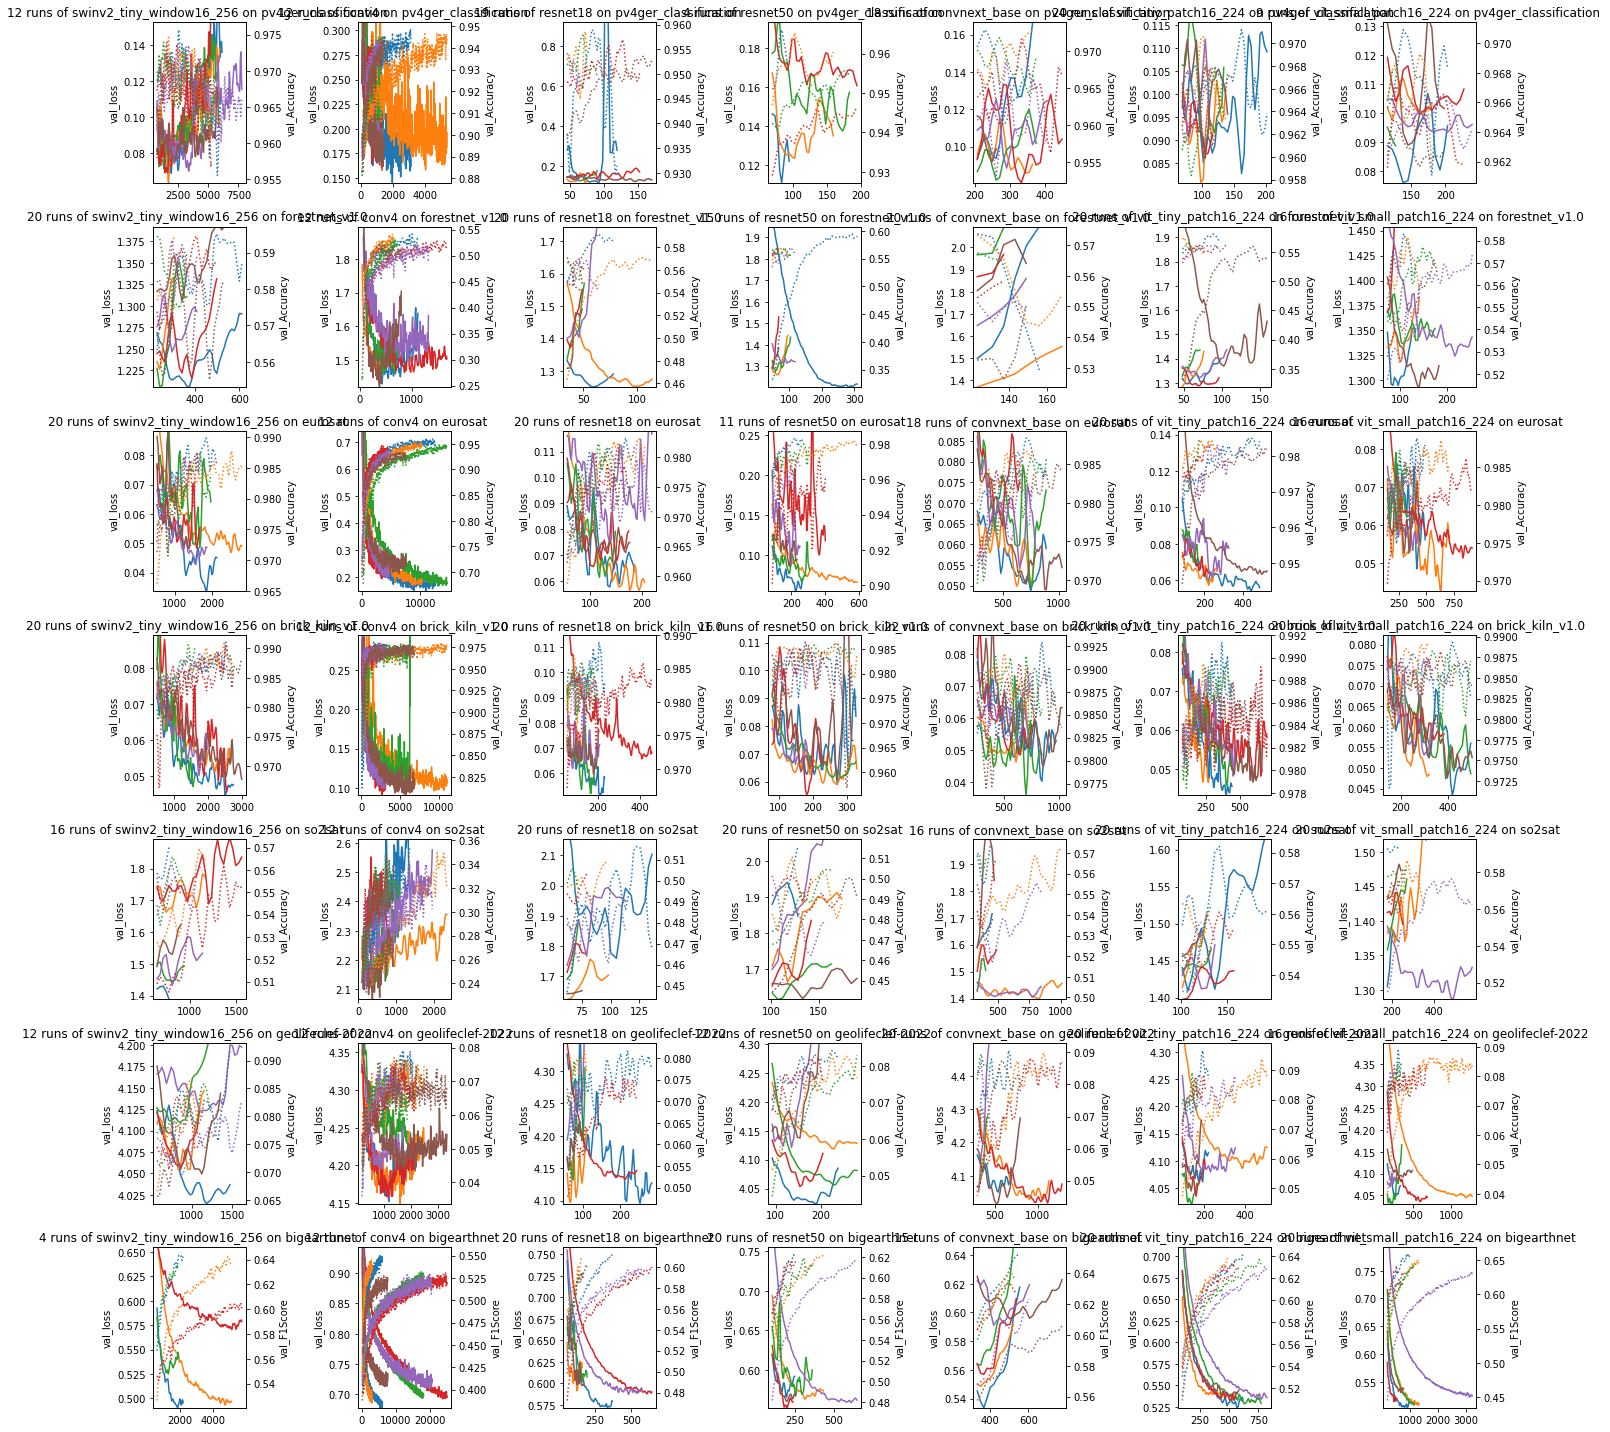

In [10]:
parse_results.plot_all_models_datasets(df_1x, plot_fn=parse_results.make_plot_sweep(filt_size=20, top_k=6, legend=False), fig_size=(40,40))
plt.tight_layout()


pv4ger_classification
defaultdict(<class 'list'>, {})
{'/mnt/data/experiments/nils/new_classification_sweeps/1.00x_train_classification_v0.6_09-06-2022_16:20:22/pv4ger_classification/csv_logs/version_10': '', '/mnt/data/experiments/nils/new_classification_sweeps/1.00x_train_classification_v0.6_09-06-2022_16:20:22/pv4ger_classification/csv_logs/version_2': '', '/mnt/data/experiments/nils/new_classification_sweeps/1.00x_train_classification_v0.6_09-06-2022_16:20:22/pv4ger_classification/csv_logs/version_9': '', '/mnt/data/experiments/nils/new_classification_sweeps/1.00x_train_classification_v0.6_09-06-2022_16:20:22/pv4ger_classification/csv_logs/version_3': '', '/mnt/data/experiments/nils/new_classification_sweeps/1.00x_train_classification_v0.6_09-06-2022_16:20:22/pv4ger_classification/csv_logs/version_0': '', '/mnt/data/experiments/nils/new_classification_sweeps/1.00x_train_classification_v0.6_09-06-2022_16:20:22/pv4ger_classification/csv_logs/version_11': ''}


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


forestnet_v1.0
defaultdict(<class 'list'>, {})
{'/mnt/data/experiments/nils/new_classification_sweeps/1.00x_train_classification_v0.6_09-12-2022_14:43:44/forestnet_v1.0/csv_logs/version_1': '', '/mnt/data/experiments/nils/new_classification_sweeps/1.00x_train_classification_v0.6_09-12-2022_14:43:44/forestnet_v1.0/csv_logs/version_4': '', '/mnt/data/experiments/nils/new_classification_sweeps/1.00x_train_classification_v0.6_09-12-2022_14:43:44/forestnet_v1.0/csv_logs/version_2': '', '/mnt/data/experiments/nils/new_classification_sweeps/1.00x_train_classification_v0.6_09-12-2022_14:43:44/forestnet_v1.0/csv_logs/version_14': '', '/mnt/data/experiments/nils/new_classification_sweeps/1.00x_train_classification_v0.6_09-12-2022_14:43:44/forestnet_v1.0/csv_logs/version_18': '', '/mnt/data/experiments/nils/new_classification_sweeps/1.00x_train_classification_v0.6_09-12-2022_14:43:44/forestnet_v1.0/csv_logs/version_7': ''}


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


eurosat
defaultdict(<class 'list'>, {})
{'/mnt/data/experiments/nils/new_classification_sweeps/1.00x_train_classification_v0.6_09-12-2022_14:43:44/eurosat/csv_logs/version_4': '', '/mnt/data/experiments/nils/new_classification_sweeps/1.00x_train_classification_v0.6_09-12-2022_14:43:44/eurosat/csv_logs/version_5': '', '/mnt/data/experiments/nils/new_classification_sweeps/1.00x_train_classification_v0.6_09-12-2022_14:43:44/eurosat/csv_logs/version_19': '', '/mnt/data/experiments/nils/new_classification_sweeps/1.00x_train_classification_v0.6_09-12-2022_14:43:44/eurosat/csv_logs/version_3': '', '/mnt/data/experiments/nils/new_classification_sweeps/1.00x_train_classification_v0.6_09-12-2022_14:43:44/eurosat/csv_logs/version_6': '', '/mnt/data/experiments/nils/new_classification_sweeps/1.00x_train_classification_v0.6_09-12-2022_14:43:44/eurosat/csv_logs/version_1': ''}


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


brick_kiln_v1.0
defaultdict(<class 'list'>, {})
{'/mnt/data/experiments/nils/new_classification_sweeps/1.00x_train_classification_v0.6_09-12-2022_14:43:44/brick_kiln_v1.0/csv_logs/version_9': '', '/mnt/data/experiments/nils/new_classification_sweeps/1.00x_train_classification_v0.6_09-12-2022_14:43:44/brick_kiln_v1.0/csv_logs/version_11': '', '/mnt/data/experiments/nils/new_classification_sweeps/1.00x_train_classification_v0.6_09-12-2022_14:43:44/brick_kiln_v1.0/csv_logs/version_3': '', '/mnt/data/experiments/nils/new_classification_sweeps/1.00x_train_classification_v0.6_09-12-2022_14:43:44/brick_kiln_v1.0/csv_logs/version_19': '', '/mnt/data/experiments/nils/new_classification_sweeps/1.00x_train_classification_v0.6_09-12-2022_14:43:44/brick_kiln_v1.0/csv_logs/version_8': '', '/mnt/data/experiments/nils/new_classification_sweeps/1.00x_train_classification_v0.6_09-12-2022_14:43:44/brick_kiln_v1.0/csv_logs/version_7': ''}


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


so2sat
defaultdict(<class 'list'>, {})
{'/mnt/data/experiments/nils/new_classification_sweeps/1.00x_train_classification_v0.6_09-12-2022_14:43:44/so2sat/csv_logs/version_8': '', '/mnt/data/experiments/nils/new_classification_sweeps/1.00x_train_classification_v0.6_09-12-2022_14:43:44/so2sat/csv_logs/version_0': '', '/mnt/data/experiments/nils/new_classification_sweeps/1.00x_train_classification_v0.6_09-12-2022_14:43:44/so2sat/csv_logs/version_5': '', '/mnt/data/experiments/nils/new_classification_sweeps/1.00x_train_classification_v0.6_09-12-2022_14:43:44/so2sat/csv_logs/version_4': '', '/mnt/data/experiments/nils/new_classification_sweeps/1.00x_train_classification_v0.6_09-12-2022_14:43:44/so2sat/csv_logs/version_11': '', '/mnt/data/experiments/nils/new_classification_sweeps/1.00x_train_classification_v0.6_09-12-2022_14:43:44/so2sat/csv_logs/version_13': ''}


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


geolifeclef-2022
defaultdict(<class 'list'>, {})
{'/mnt/data/experiments/nils/new_classification_sweeps/1.00x_train_classification_v0.6_09-12-2022_14:43:44/geolifeclef-2022/csv_logs/version_9': '', '/mnt/data/experiments/nils/new_classification_sweeps/1.00x_train_classification_v0.6_09-12-2022_14:43:44/geolifeclef-2022/csv_logs/version_2': '', '/mnt/data/experiments/nils/new_classification_sweeps/1.00x_train_classification_v0.6_09-12-2022_14:43:44/geolifeclef-2022/csv_logs/version_10': '', '/mnt/data/experiments/nils/new_classification_sweeps/1.00x_train_classification_v0.6_09-12-2022_14:43:44/geolifeclef-2022/csv_logs/version_8': '', '/mnt/data/experiments/nils/new_classification_sweeps/1.00x_train_classification_v0.6_09-12-2022_14:43:44/geolifeclef-2022/csv_logs/version_7': '', '/mnt/data/experiments/nils/new_classification_sweeps/1.00x_train_classification_v0.6_09-12-2022_14:43:44/geolifeclef-2022/csv_logs/version_13': ''}


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


bigearthnet
defaultdict(<class 'list'>, {})
{'/mnt/data/experiments/nils/new_classification_sweeps/1.00x_train_classification_v0.6_09-12-2022_14:43:44/bigearthnet/csv_logs/version_2': '', '/mnt/data/experiments/nils/new_classification_sweeps/1.00x_train_classification_v0.6_09-12-2022_14:43:44/bigearthnet/csv_logs/version_0': '', '/mnt/data/experiments/nils/new_classification_sweeps/1.00x_train_classification_v0.6_09-12-2022_14:43:44/bigearthnet/csv_logs/version_3': '', '/mnt/data/experiments/nils/new_classification_sweeps/1.00x_train_classification_v0.6_09-12-2022_14:43:44/bigearthnet/csv_logs/version_1': ''}


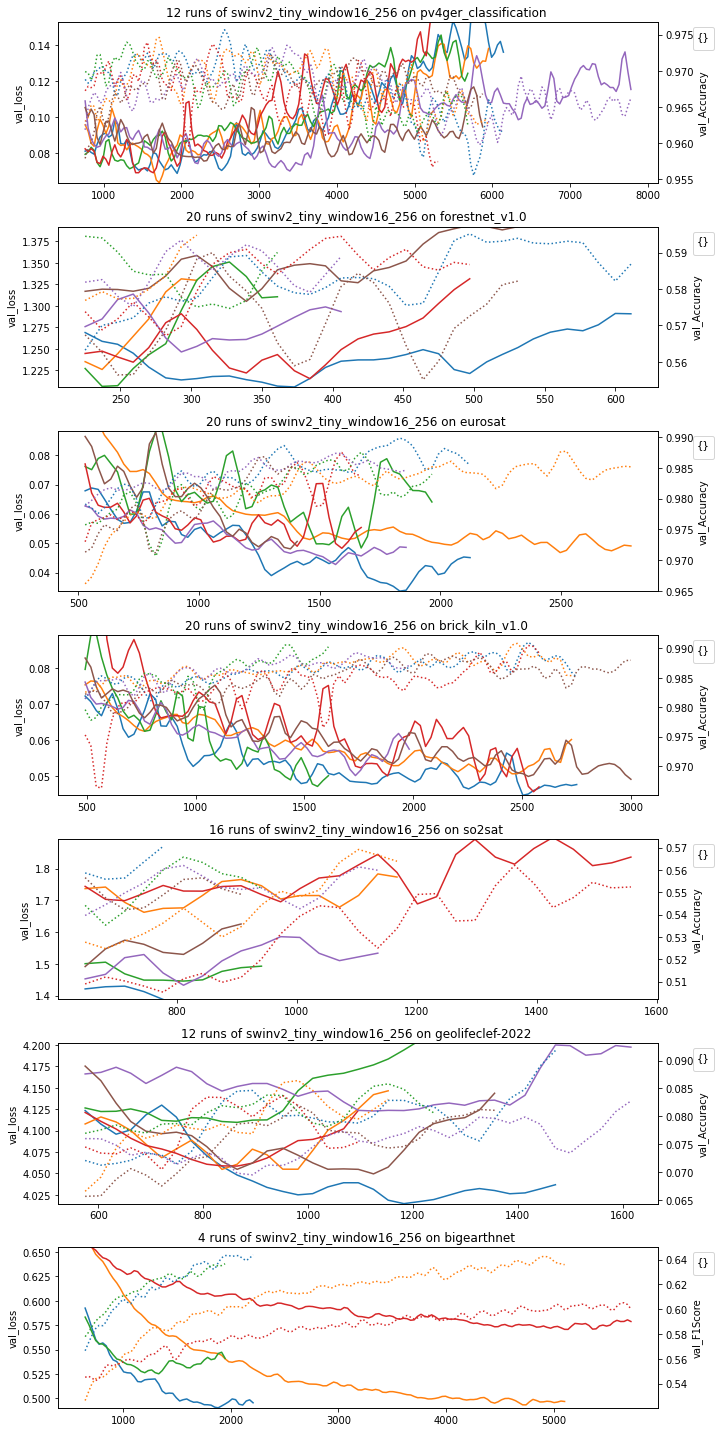

In [8]:

plt.rcParams['figure.figsize'] = [40, 40]

parse_results.plot_all_datasets(df_1x, model="swinv2_tiny_window16_256", plot_fn=parse_results.make_plot_sweep(filt_size=20, top_k=6, legend=True), fig_size=(10,20))
# parse_results.plot_all_datasets(df_1x, model="resnet50")

plt.tight_layout()


In [7]:
df.partition_name.unique()

array(['default', '0.01x_train', '0.02x_train', '0.05x_train'],
      dtype=object)

array(['pv4ger_classification', 'forestnet_v1.0', 'eurosat',
       'brick_kiln_v1.0', 'so2sat', 'geolifeclef-2022', 'bigearthnet'],
      dtype=object)